In [1]:
import numpy as np

# 加载数据
X = np.load('checkboard_plot_3/X.npy')  # 黑色区域
y = np.load('checkboard_plot_3/y.npy')      # 红色区域

# 合并特征和标签
features = X
targets = y

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('checkboard_plot_3/features.npy', features)  # 保存打乱的特征数组
np.save('checkboard_plot_3/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (11000, 2)
打乱后的标签数组形状： (11000,)
前5个特征：
 [[ 0.05374192  0.33255536]
 [ 0.79301583  0.90691016]
 [ 1.82843068 -0.36061767]
 [-0.14871691  1.95440869]
 [ 0.0278004   2.10828327]]
前5个标签： [0 0 0 0 0]


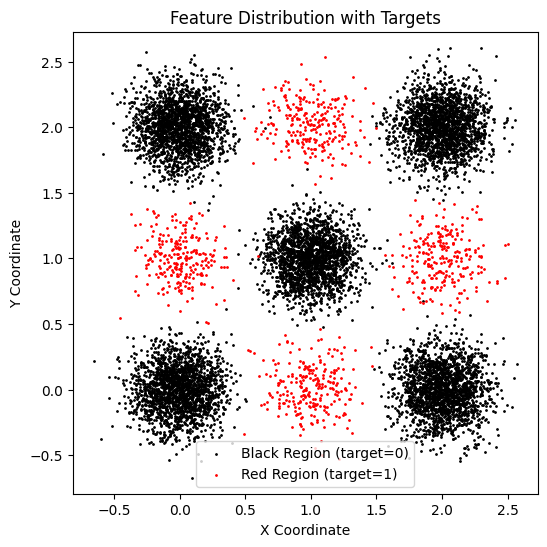

In [5]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('checkboard_plot_3/features.npy')
y = np.load('checkboard_plot_3/targets.npy')

X_test = np.load('checkboard_plot_3/X_test.npy')
y_test = np.load('checkboard_plot_3/y_test.npy')
# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



Begin to train.... - 2024-12-14 19:30:58,422 - DualGranularBalancedDeepForest
the shape of training samples: (11000, 2) - 2024-12-14 19:30:58,422 - DualGranularBalancedDeepForest
use gmean as training evaluation - 2024-12-14 19:30:58,423 - DualGranularBalancedDeepForest
stacking: False, save model: False - 2024-12-14 19:30:58,424 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-14 19:30:58,425 - DualGranularBalancedDeepForest
The shape of x_train is (11000, 2) - 2024-12-14 19:30:58,425 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9955, f1_score=0.9859, auc=0.9997, gmean=0.9747, sen=0.9500, spe=1.0000, aupr=0.9973 - 2024-12-14 19:31:01,099 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9968, f1_score=0.9904, auc=0.9999, gmean=0.9915, sen=0.9850, spe=0.9980, aupr=0.9988 - 2024-12-14 19:31:01,107 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9964, f1_score=0.9891, auc=0.9995, gmean=0.9935, sen=0.9900, spe=0.9970, aupr=0.9935 - 2024-12-14 19:31:01,115 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9964, f1_score=0.9889, auc=0.9999, gmean=0.9844, sen=0.9700, spe=0.9990, aupr=0.9985 - 2024-12-14 19:31:01,121 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9968, f1_score=0.9904, auc=0.9999, gmean=0.9915, sen=0.9850, spe=0.9980, aupr=0.9989 - 2024-12-14 19:31:01,127 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9964, f1_score=0.9889, auc=0.9969, gmean=0.9844, sen=0.9700, spe=0.9990, aupr=0.9851 - 2024-12-14 19:31:16,468 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9964, f1_score=0.9890, auc=0.9949, gmean=0.9867, sen=0.9750, spe=0.9985, aupr=0.9900 - 2024-12-14 19:31:16,476 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9955, f1_score=0.9863, auc=0.9995, gmean=0.9885, sen=0.9800, spe=0.9970, aupr=0.9910 - 2024-12-14 19:31:16,486 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9968, f1_score=0.9904, auc=0.9999, gmean=0.9892, sen=0.9800, spe=0.9985, aupr=0.9988 - 2024-12-14 19:31:16,493 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9964, f1_score=0.9890, auc=0.9974, gmean=0.9867, sen=0.9750, spe=0.9985, aupr=0.9946 - 2024-12-14 19:31:16,501 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 1
num_layers: 2
last_layer_index 0
last_layer_index 0
UncertaintyAwareDeepForest - Accuracy: 0.9950
UncertaintyAwareDeepForest - AUC: 0.9994
UncertaintyAwareDeepForest - AUPR: 0.9953
UncertaintyAwareDeepForest - Sensitivity: 0.9700
UncertaintyAwareDeepForest - Specificity: 0.9975
UncertaintyAwareDeepForest - G-Mean: 0.9837
UncertaintyAwareDeepForest - F1 Macro: 0.9848


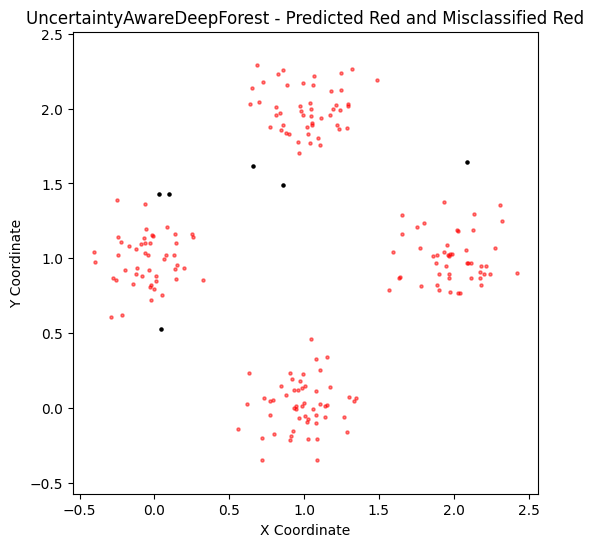

In [11]:
import os
# 配置输出文件夹
output_dir = "checkboard_plot_3"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training BalanceCascade...
BalanceCascade - Accuracy: 0.9936
BalanceCascade - AUC: 0.9968
BalanceCascade - AUPR: 0.9835
BalanceCascade - Sensitivity: 0.9800
BalanceCascade - Specificity: 0.9950
BalanceCascade - G-Mean: 0.9875
BalanceCascade - F1 Macro: 0.9810
Training SelfPacedEnsemble...
Majority class detected: 0
SelfPacedEnsemble - Accuracy: 0.9941
SelfPacedEnsemble - AUC: 0.9945
SelfPacedEnsemble - AUPR: 0.9887
SelfPacedEnsemble - Sensitivity: 0.9700
SelfPacedEnsemble - Specificity: 0.9965
SelfPacedEnsemble - G-Mean: 0.9832
SelfPacedEnsemble - F1 Macro: 0.9822
Training UnderBagging...
UnderBagging - Accuracy: 0.9941
UnderBagging - AUC: 0.9970
UnderBagging - AUPR: 0.9890
UnderBagging - Sensitivity: 0.9900
UnderBagging - Specificity: 0.9945
UnderBagging - G-Mean: 0.9922
UnderBagging - F1 Macro: 0.9825
Training EasyEnsemble...
EasyEnsemble - Accuracy: 0.8055
EasyEnsemble - AUC: 0.7866
EasyEnsemble - AUPR: 0.1883
EasyEnsemble - Sensitivity: 0.9500
EasyEnsemble - Specificity: 0.7910
Eas

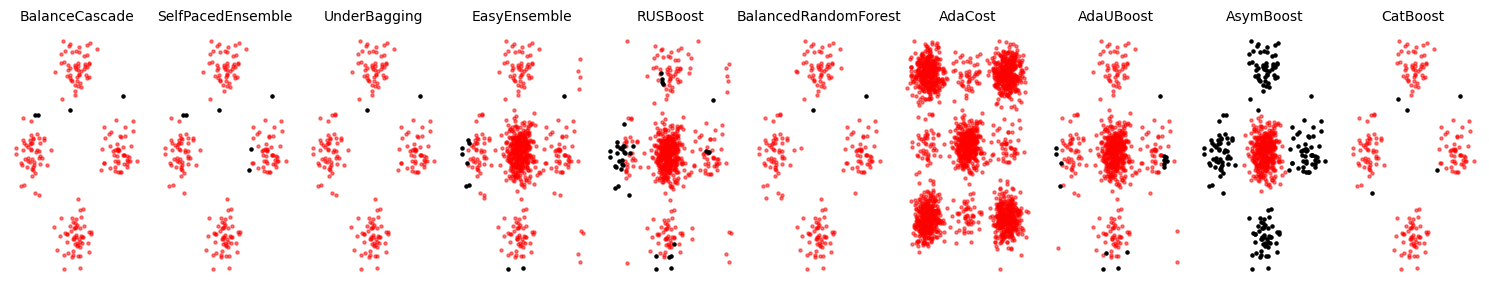

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from catboost import CatBoostClassifier

# 配置输出文件夹
output_dir = "checkboard_plot_3"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    'AdaCost': AdaCostClassifier(n_estimators=50),
    'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    'AsymBoost': AsymBoostClassifier(n_estimators=50),
    'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9936
OverBagging - AUC: 0.9946
OverBagging - AUPR: 0.9841
OverBagging - Sensitivity: 0.9750
OverBagging - Specificity: 0.9955
OverBagging - G-Mean: 0.9852
OverBagging - F1 Macro: 0.9809
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.8068
SMOTEBoost - AUC: 0.7913
SMOTEBoost - AUPR: 0.1892
SMOTEBoost - Sensitivity: 0.9500
SMOTEBoost - Specificity: 0.7925
SMOTEBoost - G-Mean: 0.8677
SMOTEBoost - F1 Macro: 0.6769
Training OverBoost...
OverBoost - Accuracy: 0.8045
OverBoost - AUC: 0.7858
OverBoost - AUPR: 0.1893
OverBoost - Sensitivity: 0.9300
OverBoost - Specificity: 0.7920
OverBoost - G-Mean: 0.8582
OverBoost - F1 Macro: 0.6722
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.6314
KmeansSMOTEBoost - AUC: 0.6289
KmeansSMOTEBoost - AUPR: 0.1198
KmeansSMOTEBoost - Sensitivity: 0.5100
KmeansSMOTEBoost - Specificity: 0.6435
KmeansSMOTEBoost - G-Mean: 0.5729
KmeansSMOTEBoost - F1 Macro: 0.4807
Training SMOTEBagging...
SMOTEBagging - 

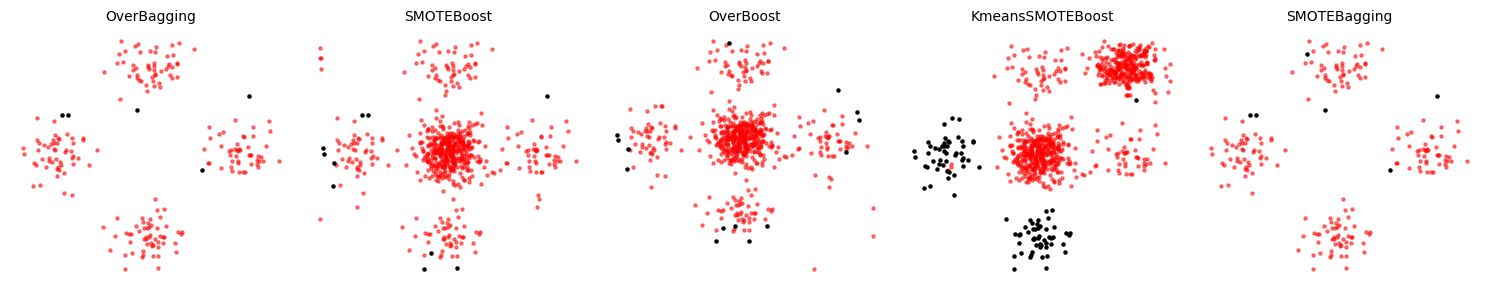

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "checkboard_plot_3"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()


性能结果：
{'AdaCost': [], 'AdaUBoost': [], 'AsymBoost': [], 'BalanceCascade': [], 'BalancedRandomForest': [], 'CatBoost': [], 'EasyEnsemble': [], 'KmeansSMOTEBoost': [], 'OverBagging': [], 'OverBoost': [], 'RUSBoost': [], 'SelfPacedEnsemble': [], 'SMOTEBagging': [], 'SMOTEBoost': [], 'UncertaintyAwareDeepForest': [], 'UnderBagging': []}


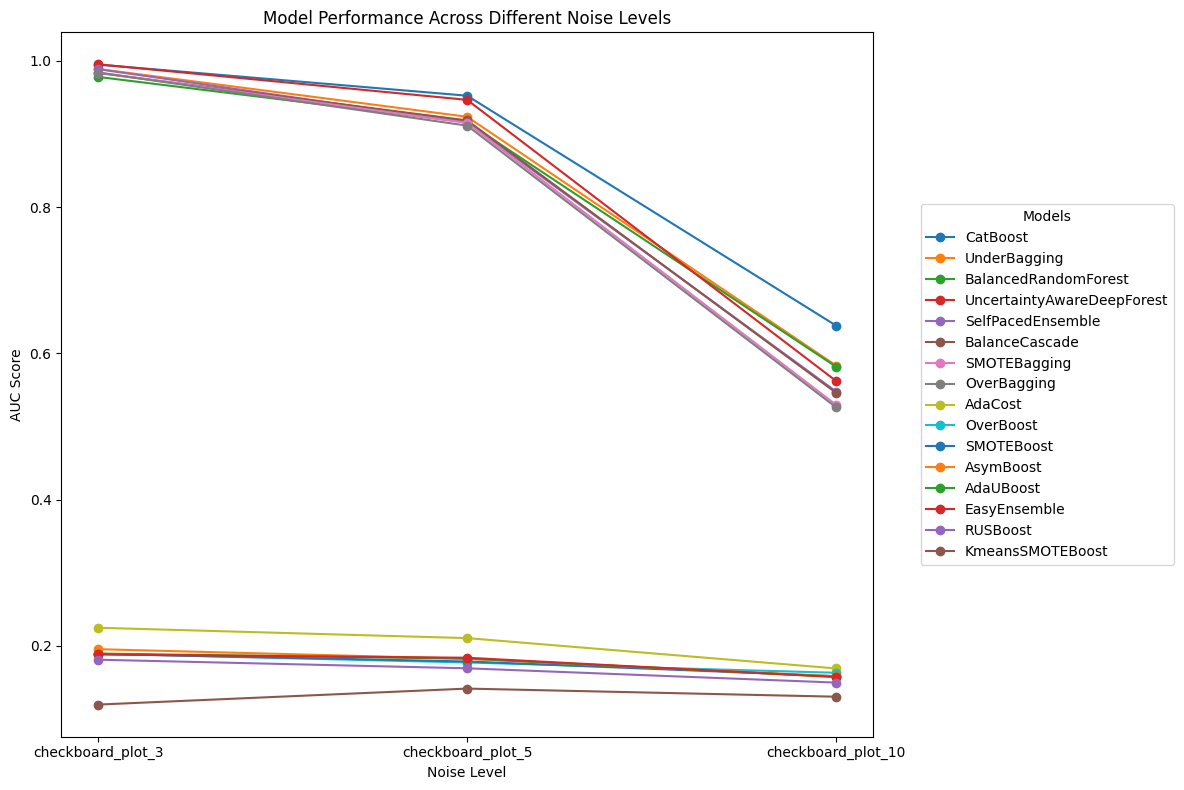

筛选后模型在 Noisy_5 的 AUC 排序：
CatBoost: Noisy_5 AUC = 0.6379844217366085
UnderBagging: Noisy_5 AUC = 0.5832998605315594
BalancedRandomForest: Noisy_5 AUC = 0.5817268072539453
UncertaintyAwareDeepForest: Noisy_5 AUC = 0.5622566363833968
SelfPacedEnsemble: Noisy_5 AUC = 0.5479124146597175
BalanceCascade: Noisy_5 AUC = 0.5460614972757581
SMOTEBagging: Noisy_5 AUC = 0.5296143308855865
OverBagging: Noisy_5 AUC = 0.5262318720199348
AdaCost: Noisy_5 AUC = 0.1691935968043164
OverBoost: Noisy_5 AUC = 0.1632752364090852
SMOTEBoost: Noisy_5 AUC = 0.15858237118408733
AsymBoost: Noisy_5 AUC = 0.15846527469277055
AdaUBoost: Noisy_5 AUC = 0.15773679386320008
EasyEnsemble: Noisy_5 AUC = 0.15742554417004265
RUSBoost: Noisy_5 AUC = 0.14984882694606394
KmeansSMOTEBoost: Noisy_5 AUC = 0.13055028035006835


In [27]:
from sklearn.metrics import *
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# 定义文件夹路径和模型
noisy_folders = ["checkboard_plot_3", "checkboard_plot_5", "checkboard_plot_10"]
base_path = "./"  # 修改为实际路径
model_names = [
    "AdaCost", "AdaUBoost", "AsymBoost", "BalanceCascade", "BalancedRandomForest",
    "CatBoost", "EasyEnsemble", "KmeansSMOTEBoost", "OverBagging", "OverBoost",
    "RUSBoost", "SelfPacedEnsemble", "SMOTEBagging", "SMOTEBoost",
    "UncertaintyAwareDeepForest", "UnderBagging"
]

# 定义开关：是否展示性能比 UncertaintyAwareDeepForest 好的模型
show_better_models = True  # 设置为 True 表示展示比它好的模型

# 保存性能结果的字典
performance_results = {model: [] for model in model_names}
print("性能结果：")
print(performance_results)

# 遍历每个 noisy 文件夹，包括无噪声文件夹
for folder in noisy_folders:
    folder_path = os.path.join(base_path, folder)
    targets_path = os.path.join(folder_path, "y_test.npy")
    
    # 加载真实标签
    if not os.path.exists(targets_path):
        print(f"Warning: Missing targets file in {folder}")
        continue
    targets = np.load(targets_path)
    # print(f"加载 {folder} 的真实标签：", targets.shape)
    
    # 遍历每个模型，加载预测结果并计算性能
    for model in model_names:
        pred_file = os.path.join(folder_path, f"{model}_y_pred_proba.npy")
        if os.path.exists(pred_file):
            y_pred_proba = np.load(pred_file)
            # print(f"加载 {folder} 的 {model} 预测结果：", y_pred_proba.shape)
            try:
                auc = average_precision_score(targets, y_pred_proba[:, 1])
                # print("y_pred_proba[:, 1]:", y_pred_proba[:, 1])
                performance_results[model].append(auc)
            except ValueError:
                raise ValueError(f"Error calculating AUC for {model} in {folder}")
                performance_results[model].append(None)
        else:
            performance_results[model].append(None)

# 计算 UncertaintyAwareDeepForest 在 Noisy_5 的 AUC
uadf_auc = performance_results.get("UncertaintyAwareDeepForest", [-np.inf])[-1]

# 筛选模型
if show_better_models:
    # 展示所有模型，包括性能比 UncertaintyAwareDeepForest 好的
    filtered_performance = {
        model: scores for model, scores in performance_results.items()
        if scores[-1] is not None
    }
else:
    # 只展示性能不超过 UncertaintyAwareDeepForest 的模型
    filtered_performance = {
        model: scores for model, scores in performance_results.items()
        if scores[-1] is not None and scores[-1] <= uadf_auc
    }

# 对筛选后的模型按照 Noisy_5 AUC 排序
final_scores = [(model, scores[-1]) for model, scores in filtered_performance.items()]
sorted_models = sorted(final_scores, key=lambda x: x[1], reverse=True)

# 绘制性能折线图
plt.figure(figsize=(12, 8))
x_labels = ["checkboard_plot_3", "checkboard_plot_5", "checkboard_plot_10"]

# 按排序后的顺序绘图
for model, _ in sorted_models:
    scores = performance_results[model]
    if any(score is not None for score in scores):
        valid_scores = [score if score is not None else np.nan for score in scores]
        plt.plot(x_labels, valid_scores, marker='o', label=model)

plt.title("Model Performance Across Different Noise Levels")
plt.xlabel("Noise Level")
plt.ylabel("AUC Score")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Models")
plt.tight_layout()
plt.show()

# 输出筛选后排序的模型
print("筛选后模型在 Noisy_5 的 AUC 排序：")
for model, score in sorted_models:
    print(f"{model}: Noisy_5 AUC = {score}")


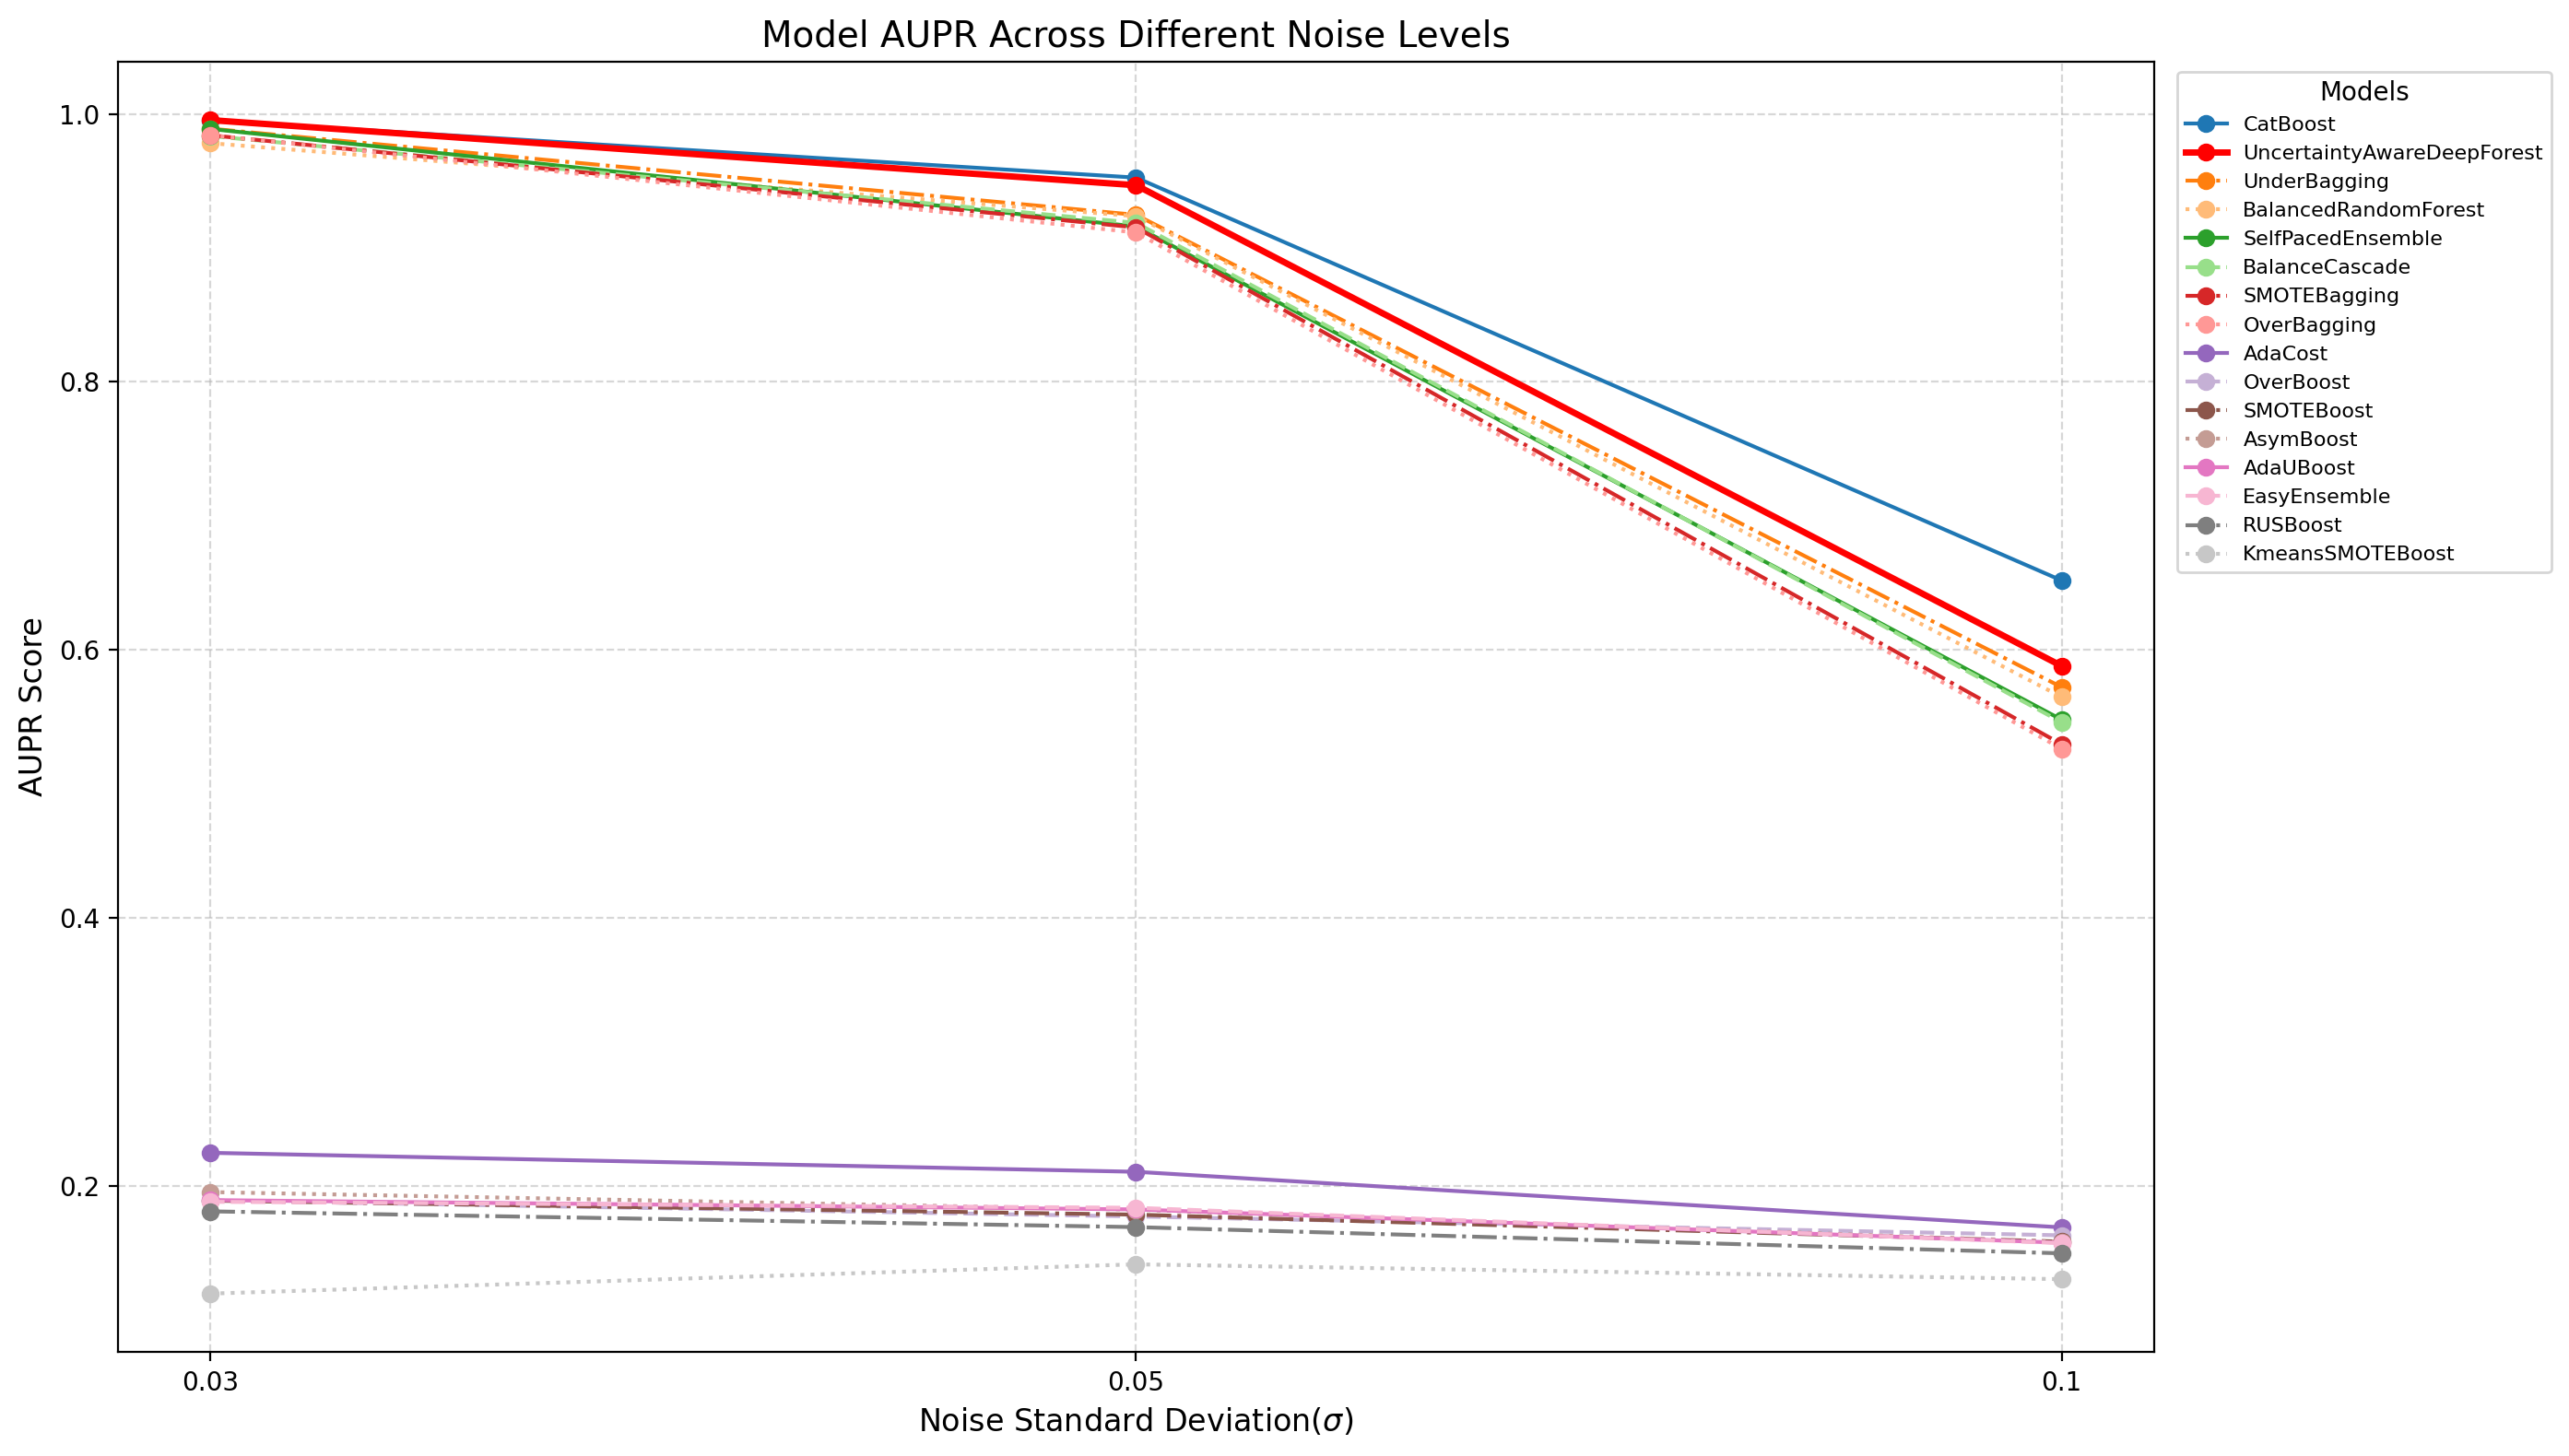

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

# 定义文件夹路径和模型
noisy_folders = ["checkboard_plot_3", "checkboard_plot_5", "checkboard_plot_10"]
base_path = "./"  # 修改为实际路径
model_names = [
    "AdaCost", "AdaUBoost", "AsymBoost", "BalanceCascade", "BalancedRandomForest",
    "CatBoost", "EasyEnsemble", "KmeansSMOTEBoost", "OverBagging", "OverBoost",
    "RUSBoost", "SelfPacedEnsemble", "SMOTEBagging", "SMOTEBoost",
    "UncertaintyAwareDeepForest", "UnderBagging"
]

# 定义开关：是否展示性能比 UncertaintyAwareDeepForest 好的模型
show_better_models = True  # 设置为 True 表示展示比它好的模型

# 保存性能结果的字典
performance_results = {model: [] for model in model_names}

# 遍历每个 noisy 文件夹，包括无噪声文件夹
for folder in noisy_folders:
    folder_path = os.path.join(base_path, folder)
    targets_path = os.path.join(folder_path, "y_test.npy")
    
    # 加载真实标签
    if not os.path.exists(targets_path):
        print(f"Warning: Missing targets file in {folder}")
        continue
    targets = np.load(targets_path)
    
    # 遍历每个模型，加载预测结果并计算性能
    for model in model_names:
        pred_file = os.path.join(folder_path, f"{model}_y_pred_proba.npy")
        if os.path.exists(pred_file):
            y_pred_proba = np.load(pred_file)
            try:
                auc = average_precision_score(targets, y_pred_proba[:, 1])
                performance_results[model].append(auc)
            except ValueError:
                performance_results[model].append(None)
        else:
            performance_results[model].append(None)

# 计算 UncertaintyAwareDeepForest 在 Noisy_5 的 AUC
uadf_auc = performance_results.get("UncertaintyAwareDeepForest", [-np.inf])[-1]

# 筛选模型
if show_better_models:
    # 展示所有模型，包括性能比 UncertaintyAwareDeepForest 好的
    filtered_performance = {
        model: scores for model, scores in performance_results.items()
        if scores[-1] is not None
    }
else:
    # 只展示性能不超过 UncertaintyAwareDeepForest 的模型
    filtered_performance = {
        model: scores for model, scores in performance_results.items()
        if scores[-1] is not None and scores[-1] <= uadf_auc
    }

# 对筛选后的模型按照 Noisy_5 AUC 排序
final_scores = [(model, scores[-1]) for model, scores in filtered_performance.items()]
sorted_models = sorted(final_scores, key=lambda x: x[1], reverse=True)

# 修改 x 轴标签为指定的值
new_x_labels = ["0.03", "0.05", "0.1"]

# 绘制性能折线图
plt.figure(figsize=(14, 8), dpi=200)

# 定义颜色和线条样式
linestyles = ['-', '--', '-.', ':']
colors = plt.cm.tab20.colors  # 颜色从 tab20 调色板选取
highlight_model = "UncertaintyAwareDeepForest"

# 按排序后的顺序绘图
for i, (model, _) in enumerate(sorted_models):
    scores = performance_results[model]
    if any(score is not None for score in scores):
        valid_scores = [score if score is not None else np.nan for score in scores]
        linestyle = linestyles[i % len(linestyles)]
        color = colors[i % len(colors)]
        if model == highlight_model:
            plt.plot(new_x_labels, valid_scores, marker='o', linestyle='-', linewidth=2.5, label=model, color="red")
        else:
            plt.plot(new_x_labels, valid_scores, marker='o', linestyle=linestyle, label=model, color=color)

plt.title("Model AUPR Across Different Noise Levels", fontsize=14)
plt.xlabel("Noise Standard Deviation($\\sigma$)", fontsize=12)
plt.ylabel("AUPR Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # 添加网格线
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title="Models", fontsize=8)
plt.tight_layout()
plt.show()
